<a href="https://colab.research.google.com/github/23WH1A0522/AIML_IIITH/blob/main/Probability_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability and statistics
Probability is about predicting the likelihood of future events, while statistics involves the analysis of the frequency of past events.

In [1]:
#imports for probabity and statistics
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

### Probability :
Probability tells how likely is the event to occur. probability is typically a boolean condition.

$$P = \frac{\text{number of favorable samples}}{\text{number of samples}}$$

For now assume that all samples in our set of all possibilities (i.e. sample space) are equally likely.

In [2]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))
result_dice = throw_dice()
print(result_dice.value_counts())
result_coin = toss_coin()
print(result_coin.value_counts())

2    22
4    19
5    16
3    15
6    14
1    14
Name: count, dtype: int64
Heads    54
Tails    46
Name: count, dtype: int64


In [3]:
fig_dice = pg.Figure([pg.Bar(x=result_dice.value_counts().keys(),y=result_dice.value_counts().values)])
fig_dice.show()

In [4]:
fig_coin = pg.Figure([pg.Bar(x=result_coin.value_counts().keys(),y=result_coin.value_counts().values)])
fig_coin.show()

## Derived Probability Distributions

Given the simple fact that each toss will be heads or tails (also called a bernoulli distribution) we can come up with a derived question, that given 20 coin tosses, what is the probability that 7 of them are heads.

You can see the probability distribution below, it's called a Binomial distribution and looks like a Bell.(for Independent and Identical)

In [5]:
count_head = pd.Series([np.sum(toss_coin(25) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=count_head.value_counts().keys(),
                        y=count_head.value_counts().values)])
fig.show()

In [ ]:
results = pd.Series([np.sum(toss_coin(500) == 'Tails') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

## How much to Sample

It's hard to estimate the probability of real world events experimentally. Like what is the probability of rolling a dice and getting a 2. Well, it's 1/6, easy to see theoretically. Often it won't be, in which case we need to see from experiments what the answer is.

We have the 1/6 theoretical result as a Red line. The probability of getting each number from 1 to 6 is shown, but the different colors represent the different number of experiments it was sampled from. Blue was estimated using 10 experiments, Red using 100, Green with a 1000, Purple with 10000, and Orange with 100000. You can see that as we get more samples, the correctness and the reliability of that correctness increases.

You can also see, that if we took 100 samples, and we have a value far away from 1/6, taking more samples will take us back to 1/6 in time. This phenomenon is called **Regression to the Mean** and you can hear more about it in the following Veritasium videos.

In [ ]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),y=result.value_counts().values/shots) for shots, result in results.items()])
fig.add_shape(type='line',x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red'))
fig.show()

## Fundamentals of Probability

For your reference, the rules of probability are reproduced as follows:
1. The probability of an event A is between 0 and 1 (inclusive): $0 \leq p(A)\leq 1$
2. The sum of the probability of all possible events (the *sample space*) is 1. $\Sigma^n_{i=0} p(A_i)=1$
3. The sum of the probability of an event and its complement is 1. $p(A^C)+p(A) = 1$
4. (Addition Rule) The probability of event A *or* event B happening is equal to the sum of the probabilities of event A and event B happening respectively, *less* the probability of event A **and** event B. $p(A \cup B)= p(A) + p(B) - p(AB)$
5. (Multiplicative Rule) If events A and B are independent, then the probability of event A and B jointly occuring is the product of the probabilities of events A and B respectively. $p(AB) = p(A)p(B)$

## Try to solve for these

1. If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

2. In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

3. Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

4. Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

In [2]:
total_cards = 52
numbered_cards = 9 * 4
# Probability of drawing a numbered card
probability_numbered_card = numbered_cards / total_cards
print("Probability of drawing a numbered card is :", probability_numbered_card)

Probability of drawing a numbered card is : 0.6923076923076923


In [3]:
prob_second_numbered = (numbered_cards - 1) / (total_cards - 1)
#Probability of both drawn cards being numbered cards
probability_both_numbered = probability_numbered_card * prob_second_numbered

print("Probability of both drawn cards being numbered cards:", probability_both_numbered)

Probability of both drawn cards being numbered cards: 0.4751131221719457


In [4]:
present_cards = total_cards - 1
probability_numbered_card = numbered_cards / present_cards
prob_second_numbered = (numbered_cards - 1) / (present_cards - 1)
#Probability of both drawn cards being numbered cards after removinga a card
probability_both_numbered = probability_numbered_card * prob_second_numbered

print("Probability of both drawn cards being numbered cards:", probability_both_numbered)

Probability of both drawn cards being numbered cards: 0.49411764705882355


## Expectation
The value, the weighted sum of the "value" of each outcome is called the expectation. Mathematically:

$$E = \sum_{i \in S} P_i V_i$$

Where S is the sample space, $P_i$ is the probability of the sample, and $V_i$ is the value associated with the sample. $i$ is each possible sample in the sample space.

## Simulating to compute Expectation

You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?

In [4]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

1 cards were thrown: 4D AD
30 cards were thrown: 10C 6S 4C 8D 9S 9C JD 6D 6H 3D 7C KH 7H 2D 5C 4S 10D 8C QC JH 8H 5H 2C 4H 9H 9D JC 5D 7D 4D AC
24 cards were thrown: 5D 5H 2D QH 7H 10H 5S QD 9C 7C 2C 4H 5C KH 9H 8C 9S 8H 10C KS 4C 10S 6H QC AC
0 cards were thrown: AD
12 cards were thrown: 4S 2S QH 8H 6H JD 6S 3D 8D 8C QD 6D AC
23 cards were thrown: 3H JH KH 6C 3S 10D 6D 9D 3D 9H JC KC 2S 6H 4S QH 2H JS 10C 8D 5D KS 9C AD
8 cards were thrown: 6H QS 7S 3S 5D KC 10C KH AC
10 cards were thrown: 6S KD JH 8S 3C 2H 6D 5D JD QS AC
0 cards were thrown: AH
3 cards were thrown: 2S 7S 3D AH

9.5371 cards are tossed before we see the first ace!


The **Technique of Contributions**.

You can say that if there was only 1 non-ace card, and 4 aces in the deck, the number of cards thrown would be $\frac{1}{5}$, since if and only if the numbered card is the first one you pick do you throw away a card, otherwise it's 0. So the card contributes $\frac{1}{5}$ to the answer, which it does if it's picked before any of the 4 aces.

Now each of the cards are non-interacting, and there are $48$ non-ace cards, so our answer would be $\frac{48}{5} = 9.6$

This is exactly what we simulated.
## Visualize the Underlying Probability Mass Function
If you guess mathematically, you will guess that almost 1/13 cards are aces, so about 12 can be met on average before you see your first ace. And you won't be totally wrong.

Of course the percentage of aces increases as you keep throwing away the cards, so the actual expectation is not that.

In [6]:
deck_result = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=deck_result.value_counts().keys(),
                        y=deck_result.value_counts().values)])
fig.show()

# Measurement and Errors

## Using Mean Squared Error
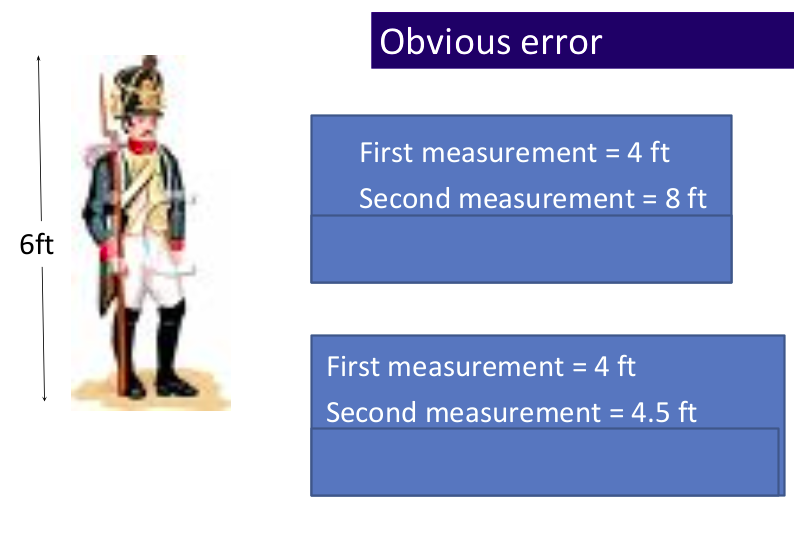

Suppose you are measuring the height of a person. You have several students, each of whom take 2 readings.

* Student 1: 4 feet and 8 feet.
* Student 2: 4 feet and 4.5 feet.
* Student 3: 6 feet and 6 feet
* Student 4: 6 feet and 10 feet

How will you rate these students?

My estimate is that would would want to rank them as:
* Student 3
* Student 2
* Student 1
* Student 4

This is because 3 is correct.
2 is wrong, but he made a 2 foot and a 1.5 foot error.
1 is worse, **even though his average is correct**, he messed up by 2 feet each time, so he should be penalized for his 2 feet errors and not let the 2 errors cancel each other out (we need absolute value of errors or square of errors to do this).
4 is the worst, he has a bizzare 4 foot error. He got to 6 foot once, but that's just by chance, while others mess in 2 feet, his is messing up in 4 feet and is the least reliable. This shows that **outliers should be penalized more**.

The Mean Squared error is a great penalty, because it punishes getting things too wrong a lot more.

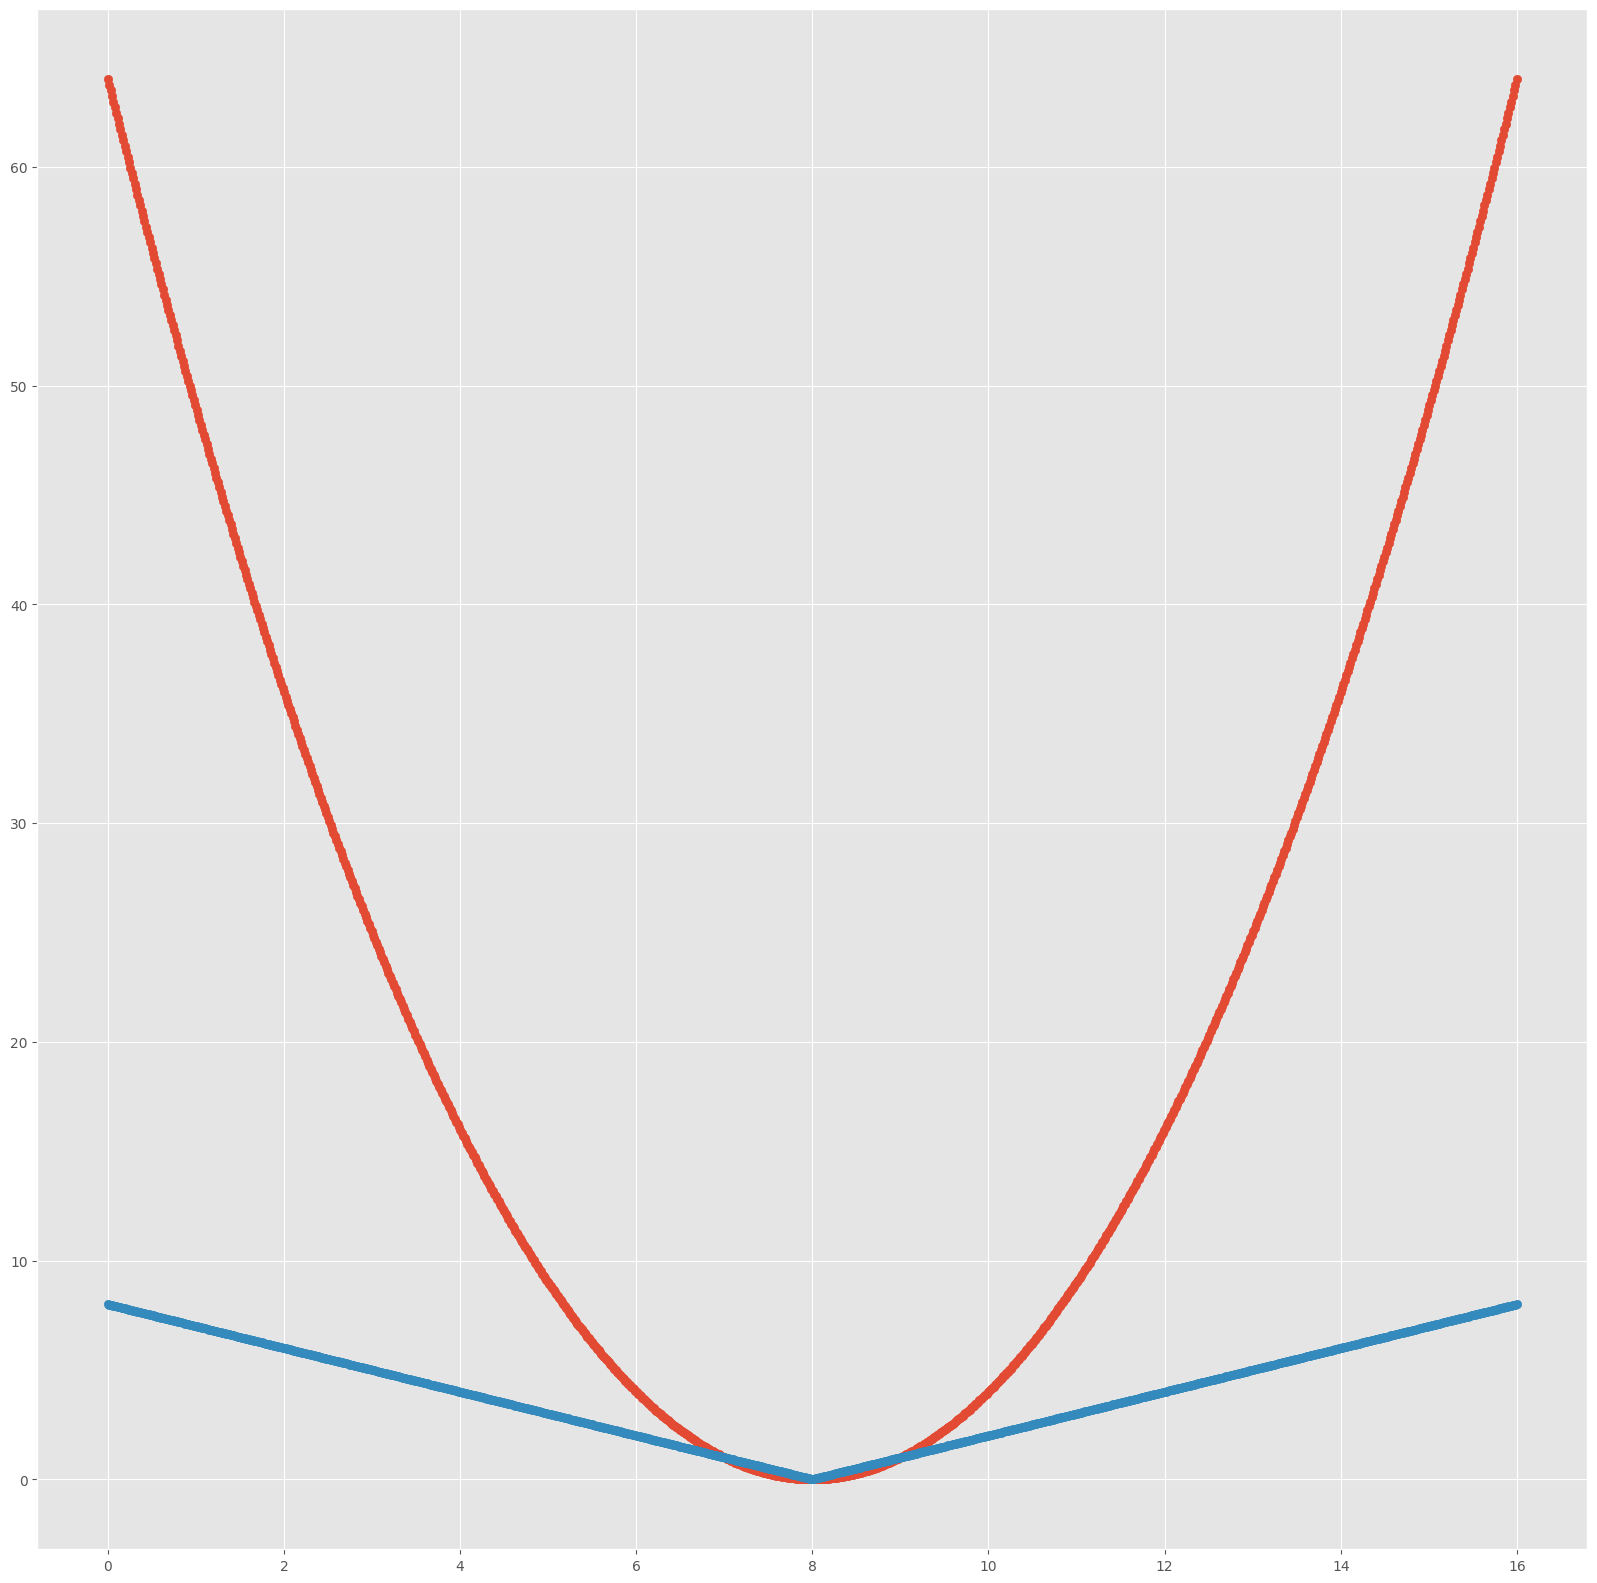

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 20))

measurements = np.linspace(0, 16, 1000)
plt.scatter(measurements, (measurements - 8) ** 2, label='Squared Error')       #blue curve
plt.scatter(measurements, abs(measurements - 8), label='Absolute Error')        #red curve
plt.show()

## Standardisation

We consider the grades dataset, which contains Physics, Biology and Maths scores for 26 students:

In [6]:
# Create a dataset
data = {
    'Student': [i+1 for i in range(26)],
    'Physics': np.random.randint(50, 100, size=26),
    'Biology': np.random.randint(50, 100, size=26),
    'Maths': np.random.randint(50, 100, size=26),
}
grades_df = pd.DataFrame(data)

print(grades_df)

#Saving the DataFrame to a CSV file
grades_df.to_csv("grades.csv", index=False)

#Read the CSV file back into a DataFrame
grades_read = pd.read_csv("grades.csv")

    Student  Physics  Biology  Maths
0         1       80       66     70
1         2       93       56     94
2         3       71       50     52
3         4       68       54     52
4         5       52       66     93
5         6       54       74     76
6         7       70       97     83
7         8       89       89     79
8         9       91       75     85
9        10       51       70     54
10       11       54       89     59
11       12       76       51     70
12       13       51       52     72
13       14       64       74     87
14       15       57       79     98
15       16       70       96     74
16       17       78       92     52
17       18       86       65     89
18       19       88       56     92
19       20       75       91     96
20       21       55       50     72
21       22       64       97     62
22       23       55       68     68
23       24       77       84     78
24       25       95       71     90
25       26       53       68     83


In [7]:
print(grades_read.shape)
grades_read.agg(["mean", "var", "std"])

(26, 4)


,Student,Physics,Biology,Maths
mean,13.500000,69.884615,72.307692,76.153846
var,58.500000,214.106154,247.021538,211.975385
std,7.648529,14.632367,15.716919,14.559374


from matplotlib import pyplot as plt
_df_0['Student'].plot(kind='hist', bins=20, title='Student')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Physics'].plot(kind='hist', bins=20, title='Physics')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Biology'].plot(kind='hist', bins=20, title='Biology')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Maths'].plot(kind='hist', bins=20, title='Maths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Student', y='Physics', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Physics', y='Biology', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Biology', y='Maths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Student'].plot(kind='line', figsize=(8, 4), title='Student')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Physics'].plot(kind='line', figsize=(8, 4), title='Physics')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Biology'].plot(kind='line', figsize=(8, 4), title='Biology')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Maths'].plot(kind='line', figsize=(8, 4), title='Maths')
plt.gca().spines[['top', 'right']].set_visible(False)

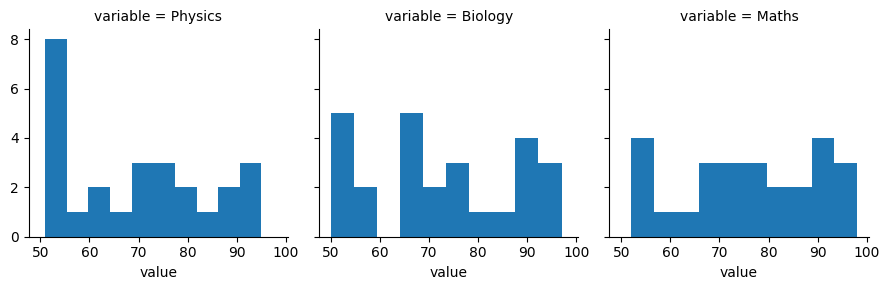

In [8]:
g = sns.FacetGrid(grades_read.melt("Student"), col="variable")
g.map(plt.hist, "value")

Suppose the instructor wanted to provide the students with an idea of how well they are performing relative to their peers, but not their exact score. This can be done by **standardising** the scores. This is done by subtracting the mean and re-scaling the data to be in units of standard deviations.  

In [9]:
grades_read["Physics_std"] = (grades_read["Physics"] - grades_read["Physics"].mean()) / grades_read["Physics"].std()
grades_read["Maths_std"] = (grades_read["Maths"] - grades_read["Maths"].mean()) / grades_read["Maths"].std()
grades_read["Biology_std"] = (grades_read["Biology"] - grades_read["Biology"].mean()) / grades_read["Biology"].std()
grades_read.head()

,Student,Physics,Biology,Maths,Physics_std,Maths_std,Biology_std
0,1,80,66,70,0.691302,-0.422672,-0.401331
1,2,93,56,94,1.579743,1.225750,-1.037588
2,3,71,50,52,0.076227,-1.658989,-1.419343
3,4,68,54,52,-0.128798,-1.658989,-1.164840
4,5,52,66,93,-1.222264,1.157066,-0.401331


from matplotlib import pyplot as plt
_df_11['Student'].plot(kind='hist', bins=20, title='Student')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Physics'].plot(kind='hist', bins=20, title='Physics')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Biology'].plot(kind='hist', bins=20, title='Biology')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Maths'].plot(kind='hist', bins=20, title='Maths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Student', y='Physics', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Physics', y='Biology', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Biology', y='Maths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Maths', y='Physics_std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student']
  ys = series['Physics']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('Student', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student')
_ = plt.ylabel('Physics')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student']
  ys = series['Biology']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Student', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student')
_ = plt.ylabel('Biology')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student']
  ys = series['Maths']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Student', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student')
_ = plt.ylabel('Maths')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student']
  ys = series['Physics_std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Student', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student')
_ = plt.ylabel('Physics_std')

from matplotlib import pyplot as plt
_df_23['Student'].plot(kind='line', figsize=(8, 4), title='Student')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Physics'].plot(kind='line', figsize=(8, 4), title='Physics')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Biology'].plot(kind='line', figsize=(8, 4), title='Biology')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Maths'].plot(kind='line', figsize=(8, 4), title='Maths')
plt.gca().spines[['top', 'right']].set_visible(False)

# Mathematics of Probability

## Conditional Probability

A **conditional probability**: a probability under a condition. Note that to calculate the conditional probability, we restrict the sample space under consideration to a condition, and then recalculate the probability as if the condition were the entire sample space.

A general formula for conditional probability is as follows. The conditional probability of A given B is

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

We take the joint probability $P(A\cap B)$ and 'inflate' it with the probability of $P(B)$.

Conditional probabilities are fundamental to the idea of **independence**. Recall that we defined independence of two events A and B as

> the probability of event A is not changed by the occurence of event B.

We can restate the definition above as

$$P(A|B)=P(A)$$


## Law of Total Probability

Let $A_1, \dots A_n$ be mutually exclusive and exhaustive events, where $P(A)\neq 0$ for all $A$. Then, the probability of $P(B)$ can be defined as

$$P(B)=\sum^n_{i=1}P(B|A_i)P(A_i)$$


## Bayes' Theorem

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

$$Posterior=\frac{Likelihood\times Prior}{Evidence}$$

An informal way of putting Bayes' Theorem:

$$P(pred|data)=\frac{P(data|actual)P(actual)}{P(data)}$$

The proof for Bayes' Theorem follows from the definition of conditional independence. We know that

$$\begin{align}
P(A\cap B)&=P(A|B)\times P(B)\\
&=P(B|A)\times P(A)
\end{align}$$

This can be rearranged to state Bayes's Theorem:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

## Random variables
- A **continuous random variable** takes on infinitely many values/real numbers. In fact, the probability of a continuous random variable taking on any one value is 0.
- A **discrete random variable** takes on a finite set of values, e.g. counts.

## Probability Distributions
A random variable is a variable whose possible values are the outcomes of a non-deterministic process.

### Binomial distribution

The **binomial distribution** models the probability of $k$ successes in $n$ independent trials.

Let's redo the lecture example with `scipy`. Import the `binom` class from `scipy.stats`:

In [10]:
from scipy.stats import binom

If the chance of winning a game is 0.75, what is the probability of losing all 5 games?

Assume the chance of winning each game is independent. Then we can solve this problem using the binomial distribution.

We use the `.pmf` method of the `binom` class. `pmf` stands for **probability mass function**: a function that states the probability that a discrete random variable is equal to any one value.

In [11]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

### Normal distribution

We move on to the **normal distribution**. There are some key properties that are important to know about this distribution:

- The mean, median and mode of the distribution is the same.
- The curve is bell-shaped.
- The total area under the curve is 1.
- Symmetric about the mean.

There are two key **shape parameters** that define the location and spread of the normal distribution: the mean, commonly denoted as $\mu$; and the standard deviation, commonly denoted as $\sigma$.

Again, start by importing the `norm` class from `scipy.stats`:

In [12]:
from scipy.stats import norm

#### Standard normal distribution

A normally distributed random variable with mean 0 and standard deviation 1 is said to follow the standard normal distribution, also known as the **z-distribution**.

A normally distributed random variable can be converted into the standard normal distribution by standardisation:

$$Z = \frac{X-\mu}{\sigma}$$

<div class="alert alert-info">
    <b>Note:</b> The <code>.pdf</code> method refers to the <b>probability density function</b>, which is the counterpart of the probability mass function for continuous random variables.
</div>

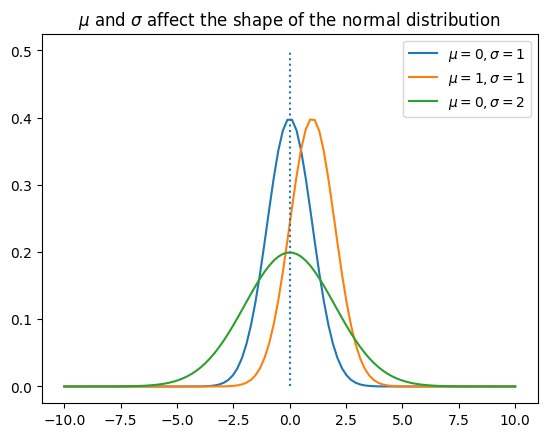

In [15]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

With continuous distributions, we do not want to find the probability of a random variable at any given value. Since the range is infinite, the probability that a continuous random variable takes on any given value is zero.

We are usually interested in finding out the probability that the random variable lies between two values.

#### Programmatic solutions: percent point function

Recall the definition of the **cumulative density function**:

$$F(x)=P(X\leq x)$$

The CDF returns the probability that a random variable is less than $x$. For instance, because of the symmetric shape of the normal distribution, the CDF of the standard normal distribution at 0 is expected to be 0.5.

We will also use the **percent point function**, available via the `ppf()` method. The percent point function does the inverse of the cumulative density function. It returns the percent point given the value of the CDF:

In [16]:
norm.cdf(0)
norm.ppf(0.5)

0.0

#### Standard deviation rule/empirical rule

A useful rule of thumb is the **standard deviation rule**, or empirical rule.

This rule states that for a normally distributed random variable,
- 68% of data lies within 1 standard deviation of the mean.
- 95% of data lies within 2 standard deviations of the mean, and
- 99.7% of data lies within 3 standard deviations of the mean.

#### Example: height

Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule.

- 84% of Malaysians have height of less than ... cm.

In [20]:
norm.ppf(0.84, loc=169.57, scale=7.57)
#169.57 + 7.57

177.09804617589782

In [19]:
#The shortest 0.15% of Malaysians are shorter than ... cm
norm.ppf(0.975, loc=169.57, scale=7.57)
#169.57 + 2 * 7.57

184.4069273629682

### Poisson distribution

The Poisson distribution models the number of events that occur in a fixed time interval.

Use the Poisson distribution when:
- events occur at random points of time and space, and
- our interest lies is the number of occurrences of the event.

The most important property of the Poisson variable is that the waiting time between events is **memoryless**:
- the time when events occur do not affect the number of successes in an interval;  
- only the length of time affects the number of successes.

The Poisson distribution has a single parameter: lambda ($\lambda$). The mean and variance of the Poisson distribution coincides with the shape parameter $\lambda$.

The probability mass function of the Poisson distribution is as follows:

$$p(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$$

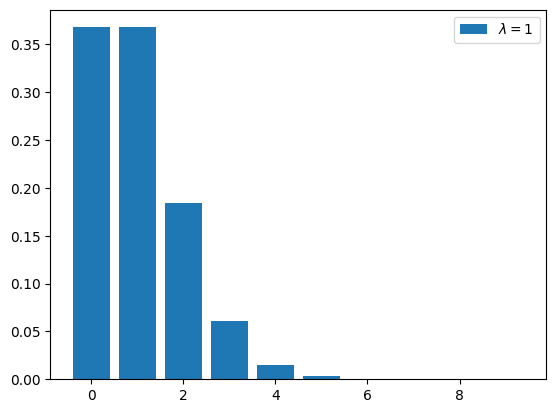

In [21]:
from scipy.stats import poisson
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.

x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


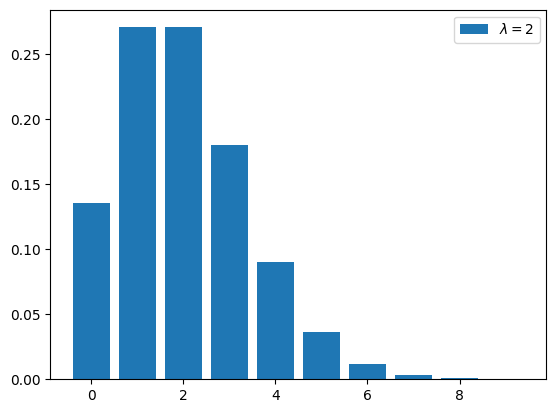

In [22]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1
# see that this is equal to lambda
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

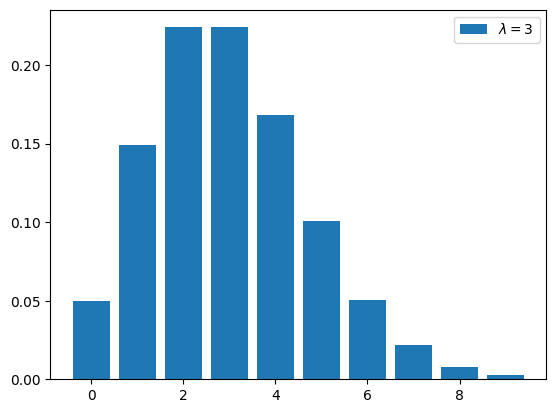

In [23]:
x @ f2
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [24]:
x @ f3
# emergency calls per hour follow a Poisson distribution and occur at a rate of 5 calls per hour. What is the probability of receiving 3 calls in any given hour?
poisson.pmf(3, 5)

0.1403738958142805

## Central Limit Theorem

The Central Limit Theorem helps us reason about realisations of sample means.

Specifically, it tells us that in many repeated samples, the distribution of the sample means of a random variable is normal regardless of the underlying population distribution.

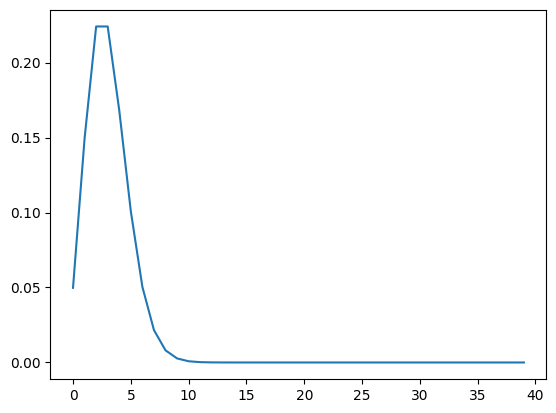

In [25]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([10., 30., 86., 99., 88., 50., 29.,  7.,  0.,  1.]),
 array([2.1  , 2.345, 2.59 , 2.835, 3.08 , 3.325, 3.57 , 3.815, 4.06 ,
        4.305, 4.55 ]),
 <BarContainer object of 10 artists>)

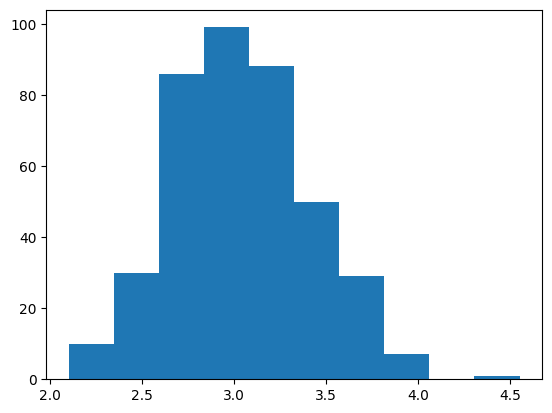

In [27]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)